In [1]:
#regression in supervised learning

In [213]:
import pandas as pd

In [214]:
df=pd.read_csv('insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [215]:
xaxis=df['bmi'].to_frame()
yaxis=df['charges']

In [216]:
xaxis.info

<bound method DataFrame.info of          bmi
0     27.900
1     33.770
2     33.000
3     22.705
4     28.880
...      ...
1333  30.970
1334  31.920
1335  36.850
1336  25.800
1337  29.070

[1338 rows x 1 columns]>

In [219]:
import sklearn
from sklearn.model_selection import train_test_split
'''train_test_split returns 4 parameters, it takes independent value 
and the dependent value and the test size , test size actually 20-30% 
of the training data'''
trainx,testx,trainy,testy=train_test_split(xaxis,yaxis,test_size=0.2,random_state=42)

In [220]:
#there are two types of regression linear and multiple regression we are tring linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [221]:
#shape of training part must be same
print(trainx.shape,trainy.shape)

(1070, 1) (1070,)


In [222]:
#training the model on training part of x-axis and y-axis
regression.fit(trainx,trainy)

LinearRegression()

In [223]:
#predicting the new value of charges using bmi value from test part
regression.predict(testx.iloc[0].values.reshape(1,1))

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11232.66307168])

In [224]:
#printing the accuracy of moder
accuracy=regression.score(testx,testy)
print(accuracy)

0.03970193117941878


In [225]:
#method 1 to find new charges value
bmi=float(input('enter bmi value to predict charges:'))
newarray=np.array([[bmi]])
charges=regression.predict(newarray)
print("new charges will be :",charges)

enter bmi value to predict charges: 32.33


new charges will be : [14040.54654522]


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [226]:
#linear regression has a linear line equation given as y=mx+b
#here y is dependent on x, m is x'x co-efficient and b is intercept
#linear equation for our trained model is
m=regression.coef_
b=regression.intercept_
print(m,b)

[392.43654417] 1353.073072204661


In [227]:
#method 2 to find new value of charges using bmi
bmi=float(input("enter value of bmi:"))
charges=(m*bmi+b)
print("new value of charges will be:",charges)

enter value of bmi: 32.33


new value of charges will be: [14040.54654522]


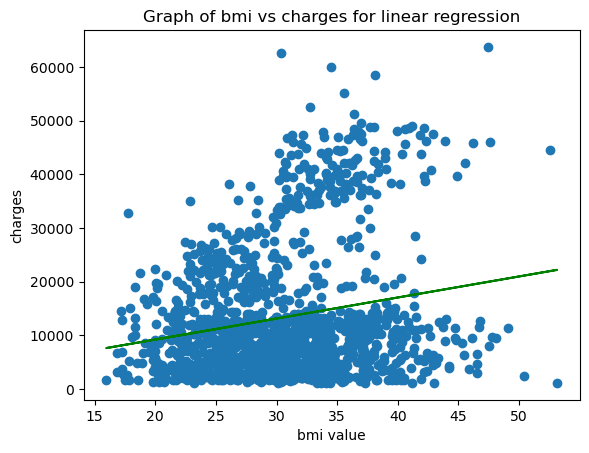

In [228]:
#plotting on co-ordinates
import matplotlib.pyplot as plt
plt.scatter(df['bmi'],df['charges'])
#green line will represent the linear line 
plt.plot(trainx,regression.predict(trainx),color='green')
plt.xlabel('bmi value')
plt.ylabel('charges')
plt.title('Graph of bmi vs charges for linear regression')
plt.show()